<a href="https://colab.research.google.com/github/banteamlak1888/ML_project_2025/blob/main/DL_Ass_Part_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size=25, face='Times New Roman'>🛠 Step 1: **Setup** and **Import** Packeges</font>#

In [9]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
# torchvision for MNIST dataset and transforms
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Data handling
from torch.utils.data import DataLoader, random_split
# Visualization
import matplotlib.pyplot as plt
import numpy as np
# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# <font size=25, face='Times New Roman'>🛠 Step 2: Load and Preprocess MNIST</font>

In [10]:
# Transform: convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
full_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Split: 80% train, 20% validation
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Load test data
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 9.91M/9.91M [00:06<00:00, 1.50MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 57.2kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.66MB/s]


# <font size=25, color=green face='Times New Roman'>➡️ Part A: Shallow Neural Network
</font>

# <font size=15, face='Times New Roman'>🛠 Step 3: Define Shallow Model
</font>

In [11]:
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # One hidden layer with 128 neurons
        self.fc2 = nn.Linear(128, 10)     # Output layer (10 classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)   # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# <font size=15, face='Times New Roman'>🛠 Step 4: Train Shallow Model </font>

In [17]:
# Check for GPU availability
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Instantiate the model and move it to the chosen device
model = ShallowNN().to(device)

# Define Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cuda


In [24]:
# Initialize early stopping variables
early_stop = False
best_val_loss = float('inf')  # Initialize with a very large value
patience = 3  # Define patience for early stopping
epochs_no_improve = None


for epoch in range(epochs):
    if early_stop:
        print("Early stopping triggered.")
        break

    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
          f"Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            early_stop = True


Epoch [1/10] - Training Loss: 0.0310, Validation Loss: 0.1086, Training Accuracy: 98.89%, Validation Accuracy: 97.17%
Epoch [2/10] - Training Loss: 0.0287, Validation Loss: 0.1028, Training Accuracy: 98.99%, Validation Accuracy: 97.35%
Epoch [3/10] - Training Loss: 0.0261, Validation Loss: 0.1122, Training Accuracy: 99.16%, Validation Accuracy: 97.23%
Epoch [4/10] - Training Loss: 0.0258, Validation Loss: 0.1123, Training Accuracy: 99.09%, Validation Accuracy: 97.17%
Epoch [5/10] - Training Loss: 0.0249, Validation Loss: 0.1258, Training Accuracy: 99.11%, Validation Accuracy: 97.02%
Early stopping triggered.


In [18]:



# Lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
epochs = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, "
          f"Training Accuracy: {train_acc:.2f}%, Validation Accuracy: {val_acc:.2f}%")

Epoch [1/10] - Training Loss: 0.4179, Validation Loss: 0.2673, Training Accuracy: 87.82%, Validation Accuracy: 92.17%
Epoch [2/10] - Training Loss: 0.2274, Validation Loss: 0.2049, Training Accuracy: 93.28%, Validation Accuracy: 94.02%
Epoch [3/10] - Training Loss: 0.1662, Validation Loss: 0.1664, Training Accuracy: 95.10%, Validation Accuracy: 95.22%
Epoch [4/10] - Training Loss: 0.1303, Validation Loss: 0.1489, Training Accuracy: 96.12%, Validation Accuracy: 95.42%
Epoch [5/10] - Training Loss: 0.1092, Validation Loss: 0.1286, Training Accuracy: 96.76%, Validation Accuracy: 96.03%
Epoch [6/10] - Training Loss: 0.0951, Validation Loss: 0.1167, Training Accuracy: 97.09%, Validation Accuracy: 96.43%
Epoch [7/10] - Training Loss: 0.0842, Validation Loss: 0.1167, Training Accuracy: 97.37%, Validation Accuracy: 96.58%
Epoch [8/10] - Training Loss: 0.0734, Validation Loss: 0.1072, Training Accuracy: 97.69%, Validation Accuracy: 96.74%
Epoch [9/10] - Training Loss: 0.0680, Validation Loss: 0

In [20]:
# After the training loop, save the model
torch.save(model.state_dict(), 'trained_model.pth')

In [21]:
# Save the model, optimizer state, and epoch
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'train_accuracies': train_accuracies,
    'val_accuracies': val_accuracies,
}, 'checkpoint.pth')

# <font size=15, face='Times New Roman'>🛠 Step 5: Plot Loss Curves </font>




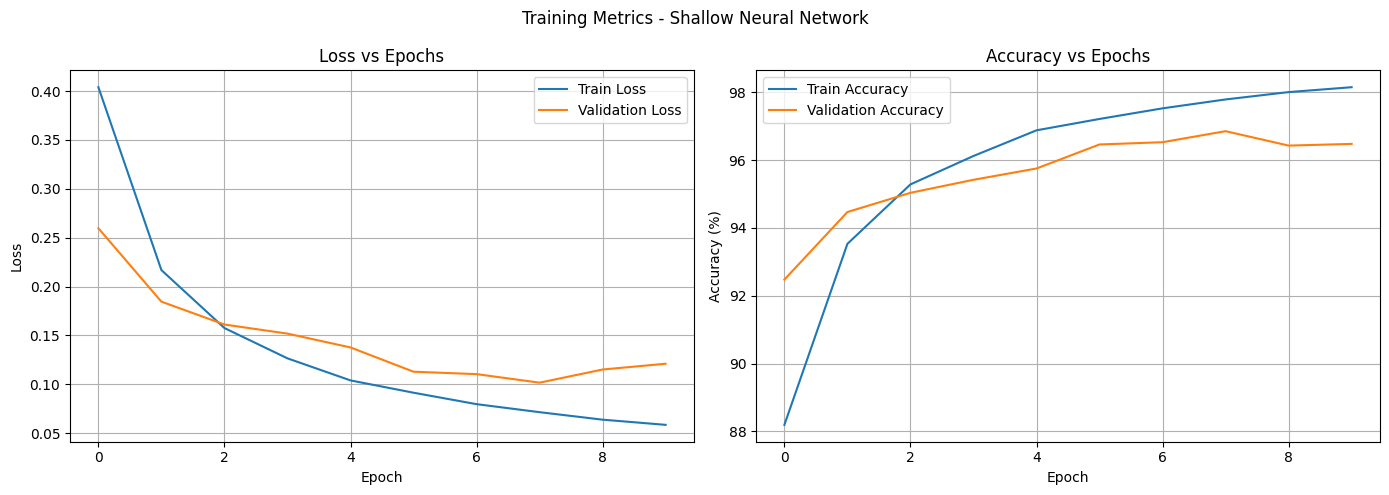

In [13]:

# Create a figure with 2 subplots: loss and accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Loss
axs[0].plot(train_losses, label='Train Loss')
axs[0].plot(val_losses, label='Validation Loss')
axs[0].set_title('Loss vs Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot Accuracy
axs[1].plot(train_accuracies, label='Train Accuracy')
axs[1].plot(val_accuracies, label='Validation Accuracy')
axs[1].set_title('Accuracy vs Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Training Metrics - Shallow Neural Network')
plt.tight_layout()
plt.show()


In [8]:
!pip install torchview
from torchview import draw_graph

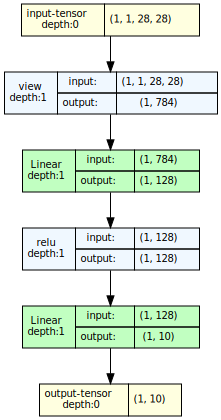

In [ ]:


model = ShallowNN().to(device)
model_graph = draw_graph(model, input_size=(1, 1, 28, 28))
model_graph.visual_graph



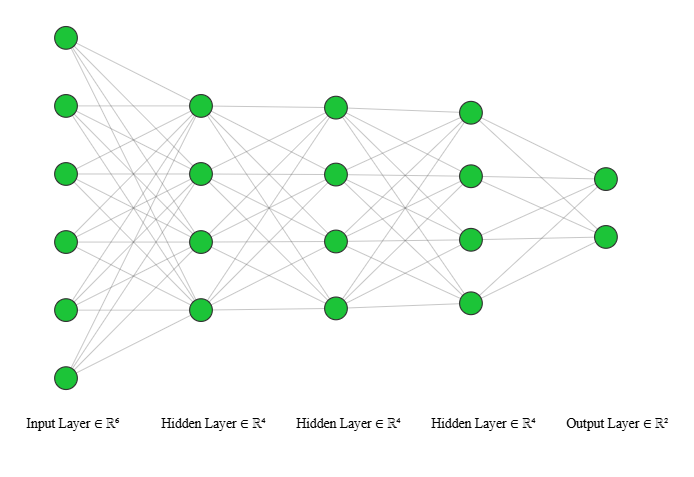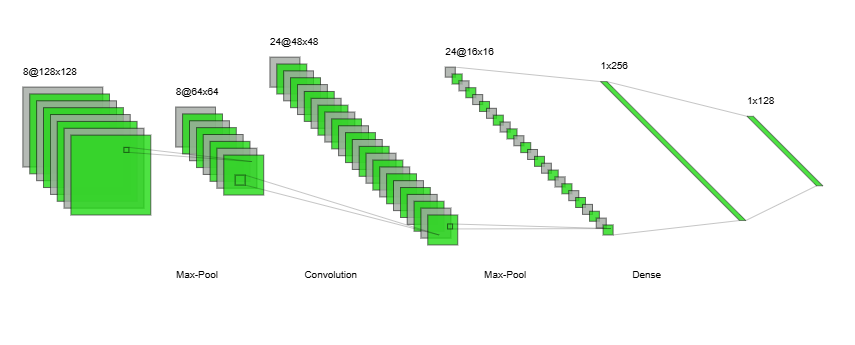

# <font size=15, face='Times New Roman'>🛠 Display Grid of Sample Images </font>

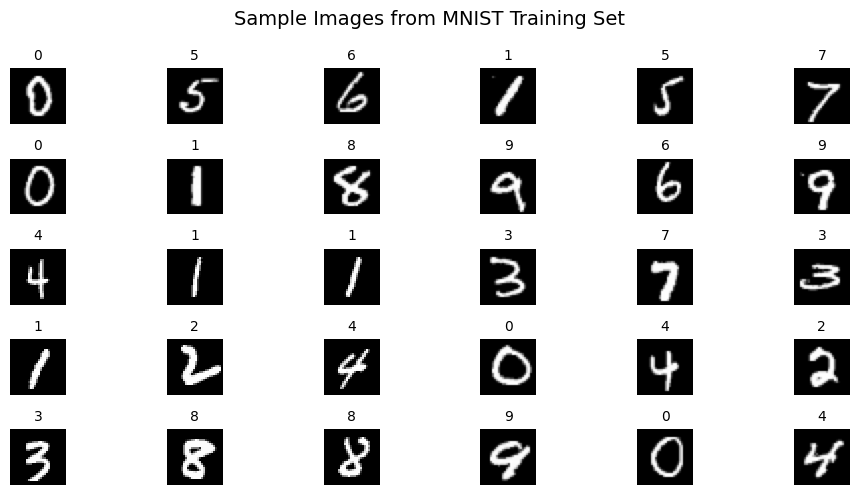

In [14]:
import matplotlib.pyplot as plt
import torchvision

# Load a batch from training loader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot a 5x6 grid (30 images)
fig, axes = plt.subplots(5, 6, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(str(labels[i].item()), fontsize=10)
    ax.axis('off')

plt.suptitle("Sample Images from MNIST Training Set", fontsize=14)
plt.tight_layout()
plt.show()


# <font size=15, face='Times New Roman'>🛠 Step 6: Evaluate and Confusion Matrix </font>

Test Accuracy (Shallow Network): 96.58%


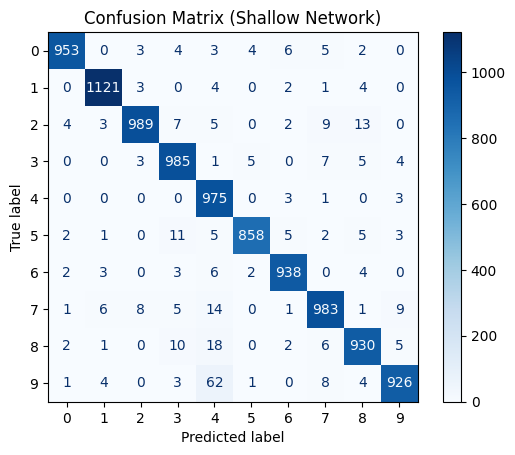

In [15]:
# Accuracy on test set
model.eval()
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(f"Test Accuracy (Shallow Network): {100 * correct / total:.2f}%")

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Shallow Network)")
plt.show()
